In [1]:
import os
import re

import cv2
import numpy as np
import pandas as pd

1. Download dataset from https://fki.tic.heia-fr.ch/databases/iam-handwriting-database. (ascii, lines, split-indexes)
2. Create root directory '../input/iam'
3. Put dataset into the root directory and unzip it 

In [2]:
ROOT = f'../input/iam'

In [3]:
train_ids = [line.strip() for line in open(f'{ROOT}/trainset.txt').readlines()]
valid1_ids = [line.strip() for line in open(f'{ROOT}/validationset1.txt').readlines()]
valid2_ids = [line.strip() for line in open(f'{ROOT}/validationset2.txt').readlines()]
test_ids = [line.strip() for line in open(f'{ROOT}/testset.txt').readlines()]

def get_stage(image_id):
    if image_id in train_ids:
        return 'train'
    if image_id in valid1_ids:
        return 'valid'
    if image_id in valid2_ids:
        return 'valid'
    if image_id in test_ids:
        return 'test'
    return 'unknown'

In [4]:
dataset = []

for line in open(f'{ROOT}/ascii/lines.txt').readlines():
    line = line.strip()
    if line.startswith('#'):
        continue
        
    sample_id, text = re.findall(
        r'([\S]+)\s\w+\s\d+\s\d+\s\d+\s\d+\s\d+\s\d+\s([\w\W]+)',
        line
    )[0]
    folder, subfolder, _ = sample_id.split('-')
    subfolder = f'{folder}-{subfolder}'
    
    dataset.append({
        'sample_id': sample_id,
        'text': text.replace('|', ' ').strip(),
        'path': f'iam/images/{folder}/{subfolder}/{sample_id}.png',
        'stage': get_stage(sample_id),
    })

In [5]:
marking = pd.DataFrame(dataset).set_index('sample_id')
marking[:3]

,text,path,stage
sample_id,,,
a01-000u-00,A MOVE to stop Mr. Gaitskell from,iam/images/a01/a01-000u/a01-000u-00.png,train
a01-000u-01,nominating any more Labour life Peers,iam/images/a01/a01-000u/a01-000u-01.png,train
a01-000u-02,is to be made at a meeting of Labour,iam/images/a01/a01-000u/a01-000u-02.png,train


In [6]:
marking['stage'].value_counts()

train      6161
unknown    3491
test       1861
valid      1840
Name: stage, dtype: int64

In [7]:
os.makedirs('prepared_datasets/iam', exist_ok=True)
os.makedirs('prepared_datasets/iam/images', exist_ok=True)

In [8]:
%%time

!cp -r ../input/iam/lines/* ./prepared_datasets/iam/images/

CPU times: user 13.9 ms, sys: 10.3 ms, total: 24.2 ms
Wall time: 913 ms


iam/images/a04/a04-050/a04-050-05.png
stage: train
text: he said , they were out of date and vulnerable and
image_shape: (144, 1822, 3)


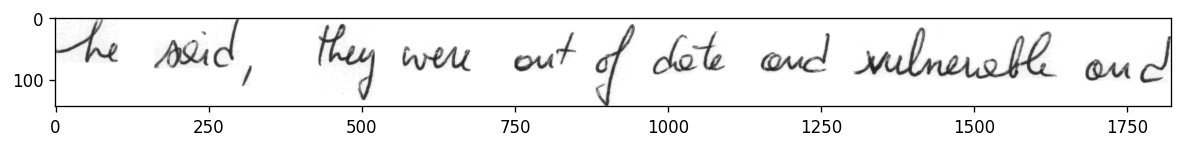

In [9]:
import matplotlib.pyplot as plt

idx = 1234

sample = marking.iloc[idx]
image_id = sample.name
print(sample.path)
image = cv2.imread(f'./prepared_datasets/{sample.path}')
text = sample['text']

print('stage:', sample['stage'])
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [10]:
marking.to_csv('./prepared_datasets/iam/marking.csv')

In [11]:
!cd ./prepared_datasets && ls iam

images	marking.csv


In [12]:
!cd ./prepared_datasets && tar -czvf iam.tar.gz iam > /dev/null

In [13]:
!du -sh ./prepared_datasets/iam.tar.gz

638M	./prepared_datasets/iam.tar.gz
